In [347]:
"""
Program Name - iris_logistic_regression.ipynb

Author: Tomasz Bronewicz
Latest Version: 1.0
Date: 27/05/2024

Changes: 
v1.0 - Initial version - Tomasz Broniewicz

============Description===========

Program that shows the logitic regression 
application for the iris dataset

===================================
"""

'\nProgram Name - iris_logistic_regression.ipynb\n\nAuthor: Tomasz Bronewicz\nLatest Version: 1.0\nDate: 27/05/2024\n\nChanges: \nv1.0 - Initial version - Tomasz Broniewicz\n\n============Description===========\n\nProgram that shows the logitic regression \napplication for the iris dataset\n\n===================================\n'

In [348]:
# importing libraries
import numpy as np
import pandas as pd

# importing visualisations
import matplotlib.pyplot as plt
import seaborn as sns

# importing sci-kit
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.utils import shuffle


# Load the dataset
data = pd.read_csv("Iris.csv")
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [349]:
# Fit the LabelEncoder
le = LabelEncoder()
data['Species_label'] = le.fit_transform(data['Species'])

# Create the binary classification
data['Species_label'] = data['Species_label'].apply(lambda x: 0 if x == 0 else 1)

# Display the value counts for the binary labels
value_counts = data['Species_label'].value_counts()

# Create a dictionary to map original labels to their encoded values
encoded_mapping = {index: label for index, label in enumerate(le.classes_)}

# Print the value counts and the mapping
print("Value Counts:\n", value_counts)
print("Encoded Mapping:\n", encoded_mapping)
data.head()

Value Counts:
 Species_label
1    100
0     50
Name: count, dtype: int64
Encoded Mapping:
 {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_label
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [350]:
# Drop the objects for correlation analysis 
data = data.drop(['Species'], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species_label  150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


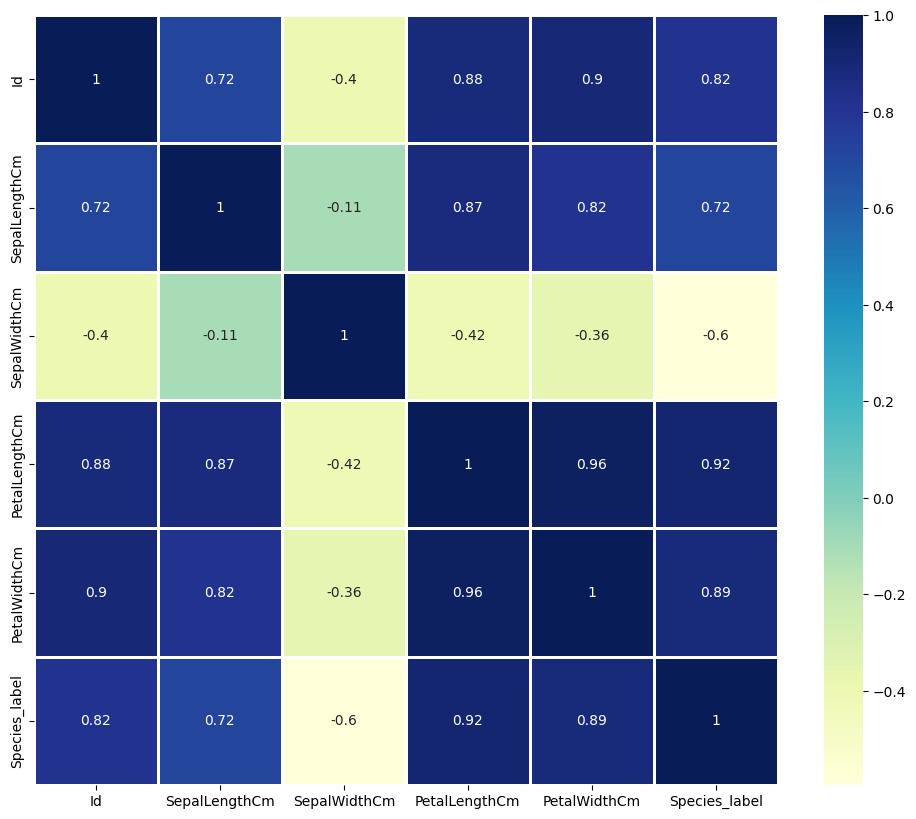

In [351]:
# Plot the heatmap to visualize feature correlations
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu', linewidths=2)
plt.show()

High positive correlation is for Sepal length and width and Petal Width therfore those features are chosen for the independent variables

In [352]:
# Shuffle the dataset for better outcomes
data = shuffle(data, random_state=42)

In [353]:
# Splitting the dataset into features and target
# independant variable
X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalWidthCm']]
# dependant variable
y = data['Species_label']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [354]:
# Initialize and train the logistic regression model
lrmodel = LogisticRegression()
lrmodel.fit(X_train, y_train)

LogisticRegression()

In [355]:
# Predict the model
y_pred = lrmodel.predict(X_test)

Accuracy Score: 100.00%
Confusion Matrix: 
 [[11  0]
 [ 0 19]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        19

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<Figure size 800x600 with 0 Axes>

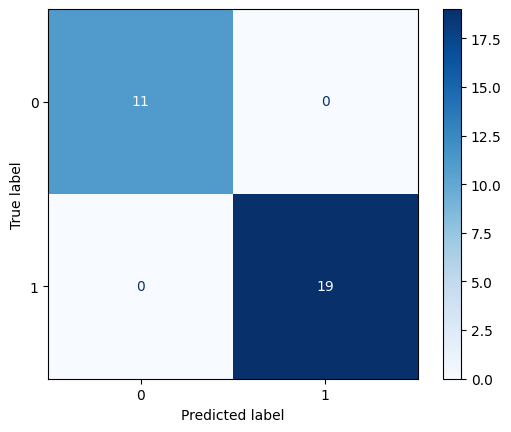

In [356]:
# Evaluate the model
print(f"Accuracy Score: {accuracy_score(y_pred, y_test) * 100:.2f}%")
print("Confusion Matrix: \n", confusion_matrix(y_pred, y_test))
print("Classification Report: \n", classification_report(y_pred, y_test))

cm = confusion_matrix(y_pred, y_test, labels=lrmodel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lrmodel.classes_)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues')
plt.show()

Now we can create the Similar dataset only create the 3 class problem with creating  multi-class classification

In [357]:
# Load the dataset
mc_data = pd.read_csv("Iris.csv")
mc_data.info()
mc_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [358]:
# Fit the LabelEncoder
multi_le = LabelEncoder()
mc_data['Species_label'] = multi_le.fit_transform(mc_data['Species'])

# Display the value counts for the binary labels
multi_value_counts = mc_data['Species_label'].value_counts()

# Create a dictionary to map original labels to their encoded values
multi_encoded_mapping = {index: label for index, label in enumerate(multi_le.classes_)}

# Print the value counts and the mapping
print("Value Counts:\n", multi_value_counts)
print("Encoded Mapping:\n", multi_encoded_mapping)
mc_data.head()

Value Counts:
 Species_label
0    50
1    50
2    50
Name: count, dtype: int64
Encoded Mapping:
 {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_label
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [359]:
# Drop the objects for correlation analysis 
mc_data = mc_data.drop(['Species'], axis = 1)
mc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species_label  150 non-null    int32  
dtypes: float64(4), int32(1), int64(1)
memory usage: 6.6 KB


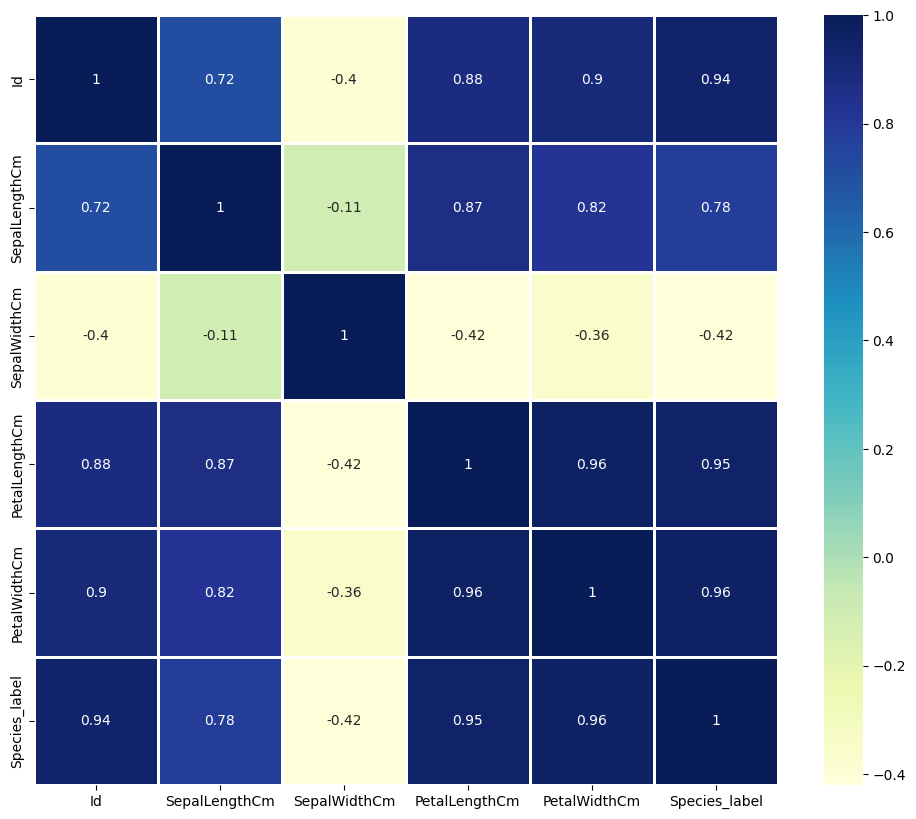

In [360]:
# Plot the heatmap to visualize feature correlations
plt.figure(figsize=(12, 10))
sns.heatmap(mc_data.corr(), annot=True, cmap='YlGnBu', linewidths=2)
plt.show()

In [361]:
# Shuffle the dataset for better outcomes
mc_data = shuffle(mc_data, random_state=42)

In [362]:
# Splitting the dataset into features and target
# independant variable
X = mc_data[['SepalLengthCm', 'SepalWidthCm', 'PetalWidthCm']]
# dependant variable
y = mc_data['Species_label']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [363]:
# Initialize and train the logistic regression model
lr_multi_model = LogisticRegression()
lr_multi_model.fit(X_train, y_train)

LogisticRegression()

In [364]:
# Predict the model
y_pred = lr_multi_model.predict(X_test)

Accuracy Score: 100.00%
Confusion Matrix: 
 [[11  0  0]
 [ 0 11  0]
 [ 0  0  8]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<Figure size 800x600 with 0 Axes>

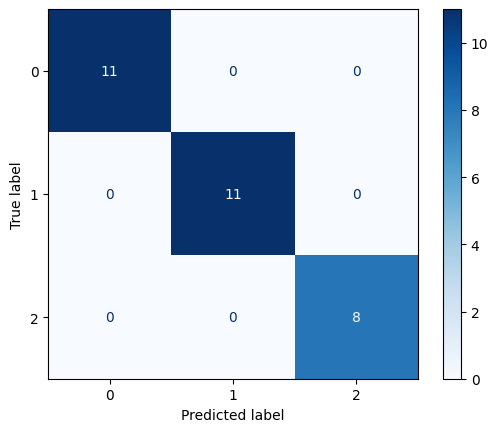

In [365]:
# Evaluate the model
print(f"Accuracy Score: {accuracy_score(y_pred, y_test) * 100:.2f}%")
print("Confusion Matrix: \n", confusion_matrix(y_pred, y_test))
print("Classification Report: \n", classification_report(y_pred, y_test))

cm = confusion_matrix(y_pred, y_test, labels=lr_multi_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_multi_model.classes_)
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues')
plt.show()

Without shuffle of the data the precessision and accuraccy is lower i.e 
Accuracy Score: 96.67%

But when randomise the datset theres is still 100% accuracy as there is higher spectrum of the seen test results